In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_excel("train__1_.xlsx")
df_train.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners
0,2826,793,2005-04-02,410,908,2.0,0.0,15,1
1,2827,793,2005-04-02,338,597,3.0,2.0,3,6
2,2828,793,2005-04-02,1364,246,2.0,3.0,13,2
3,2829,793,2005-04-02,1088,1397,1.0,0.0,2,5
4,2830,793,2005-04-02,830,1412,2.0,3.0,3,6


looks like the data is ordered by matchid and the date, lets just make sure.

In [3]:
df_train = df_train.sort_values(['LeagueId', 'MatchId', 'Date'])
df_train.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners
26,3784,729,2005-04-02,1740,396,0.0,0.0,8,2
27,3785,729,2005-04-02,974,1193,2.0,2.0,6,2
28,3786,729,2005-04-02,1118,1237,5.0,0.0,4,4
29,3787,729,2005-04-02,912,445,3.0,3.0,5,2
48,3790,729,2005-04-03,1741,297,2.0,0.0,6,2


lets get the shape

In [4]:
df_train.shape

(23830, 9)

lets check for any missing values

In [5]:
df_train.isna().sum()

MatchId         0
LeagueId        0
Date            0
HomeTeamId      0
AwayTeamId      0
Home_Goals      8
Away_Goals      8
Home_Corners    0
Away_Corners    0
dtype: int64

So there are 8 games where the home and away goals are nan, worth noting. For now lets just drop them so that they dont cause many issues.

In [6]:
df_train = df_train.dropna(subset=['Home_Goals', 'Away_Goals']).reset_index(drop=True)
df_train.isna().sum()

MatchId         0
LeagueId        0
Date            0
HomeTeamId      0
AwayTeamId      0
Home_Goals      0
Away_Goals      0
Home_Corners    0
Away_Corners    0
dtype: int64

In [7]:
df_train.shape

(23822, 9)

Lets read in the test set. As the test set doesnt really have features about the games like goals or corners, we will append it to the training set and propagate the features as we go

In [8]:
df_test = pd.read_excel('test__1_.xlsx')
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Line,Over,Under,Unnamed: 8,P(Under),P(At),P(Over),Bet (U/O),Stake
0,1,741,2011-04-01,342,694,9.5,1.790,1.80,NaN,NaN,NaN,NaN,NaN,NaN
1,2,741,2011-04-01,1424,270,11.5,1.920,2.00,NaN,NaN,NaN,NaN,NaN,NaN
2,3,729,2011-04-01,691,1137,10.5,1.970,1.87,NaN,NaN,NaN,NaN,NaN,NaN
3,4,729,2011-04-01,787,808,11.0,2.075,1.77,NaN,NaN,NaN,NaN,NaN,NaN
4,5,741,2011-04-01,784,1117,12.0,2.020,1.86,NaN,NaN,NaN,NaN,NaN,NaN


Let us have a flag for the test set

In [9]:
df_test['Is_Test'] = True
df_train['Is_Test'] = False
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Line,Over,Under,Unnamed: 8,P(Under),P(At),P(Over),Bet (U/O),Stake,Is_Test
0,1,741,2011-04-01,342,694,9.5,1.790,1.80,NaN,NaN,NaN,NaN,NaN,NaN,True
1,2,741,2011-04-01,1424,270,11.5,1.920,2.00,NaN,NaN,NaN,NaN,NaN,NaN,True
2,3,729,2011-04-01,691,1137,10.5,1.970,1.87,NaN,NaN,NaN,NaN,NaN,NaN,True
3,4,729,2011-04-01,787,808,11.0,2.075,1.77,NaN,NaN,NaN,NaN,NaN,NaN,True
4,5,741,2011-04-01,784,1117,12.0,2.020,1.86,NaN,NaN,NaN,NaN,NaN,NaN,True


The test doesnt seem to have features about goals or corners, so lets have columns that are nan for these in the test set

In [10]:
df_test['Home_Corners'] = np.nan
df_test['Away_Corners'] = np.nan
df_test['Home_Goals'] = np.nan
df_test['Away_Goals'] = np.nan

In [11]:
for cols in ['Line',
       'Over', 'Under', 'Unnamed: 8', 'P(Under)', 'P(At)', 'P(Over)',
       'Bet (U/O)', 'Stake']:
    df_train[cols] = np.nan

Now that we have filled all the missing columsn, lets concatenate the two

In [12]:
df_all = pd.concat([df_train, df_test], ignore_index=True)

In [13]:
df_all.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,Line,Over,Under,Unnamed: 8,P(Under),P(At),P(Over),Bet (U/O),Stake
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we are asked to predict the total corners in a game, lets just create columns of total goals and total corners.

In [14]:
df_all['Total_Corners'] = df_all['Away_Corners'] + df_all['Home_Corners']
df_all['Total_Goals'] = df_all['Away_Goals'] + df_all['Home_Goals']

In [15]:
df_all

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,Over,Under,Unnamed: 8,P(Under),P(At),P(Over),Bet (U/O),Stake,Total_Corners,Total_Goals
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24158,337,729,2011-05-22,1211,1118,NaN,NaN,NaN,NaN,True,...,1.95,1.961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24159,338,795,2011-05-22,1116,876,NaN,NaN,NaN,NaN,True,...,1.92,1.909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24160,339,801,2011-05-22,1223,771,NaN,NaN,NaN,NaN,True,...,2.02,1.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24161,340,801,2011-05-22,238,570,NaN,NaN,NaN,NaN,True,...,2.02,1.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I just wanted to see if there is a correlation between the total corners and total goals

In [16]:
df_all[['Total_Corners', 'Total_Goals']].corr()

,Total_Corners,Total_Goals
Total_Corners,1.000000,-0.006132
Total_Goals,-0.006132,1.000000


Let us now calculate wins and losses and draws for all the games

In [17]:
df_all['Win'] = (df_all['Home_Goals'] > df_all['Away_Goals']).astype(int)
df_all['Draw'] = (df_all['Home_Goals'] == df_all['Away_Goals']).astype(int)
df_all['Loss'] = (df_all['Home_Goals'] < df_all['Away_Goals']).astype(int)

In [18]:
df_all[['Total_Corners', 'Total_Goals', 'Win']].corr()

,Total_Corners,Total_Goals,Win
Total_Corners,1.000000,-0.006132,-0.024601
Total_Goals,-0.006132,1.000000,0.164180
Win,-0.024601,0.164180,1.000000


Let us try to see how many games are won and how many games were lost and how many games were drawn across each league

In [19]:
summary_wins_by_league = df_all.groupby('LeagueId').agg(
    {
        'Win':'sum',
        'Loss':'sum',
        'Draw':'sum'
    }
)

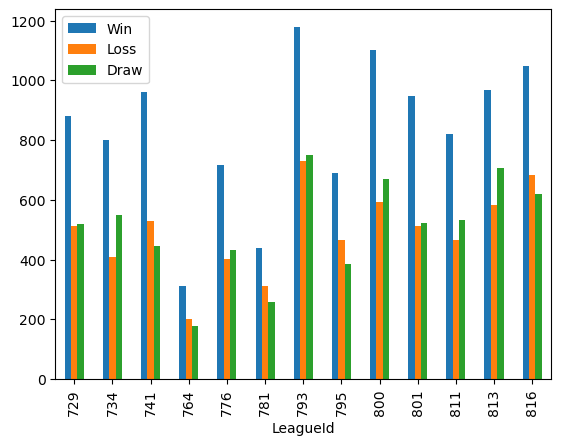

In [20]:
summary_wins_by_league.plot.bar()
plt.show()

Lets see how the goals and corners change by league

In [21]:
summary_gc_by_league = df_all.groupby('LeagueId').agg(
    {
        'Total_Corners':'sum',
        'Total_Goals':'sum',
    }
)

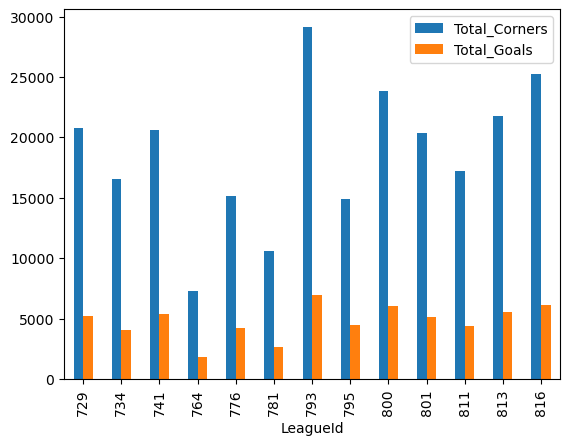

In [22]:
summary_gc_by_league.plot.bar()
plt.show()

Lets see the distribution of corners and goals by home and away teams specific to each league

In [23]:
summary_goals_by_league = df_all.groupby('LeagueId').agg(
    {
        'Home_Goals':'sum',
        'Away_Goals':'sum',
    }
)

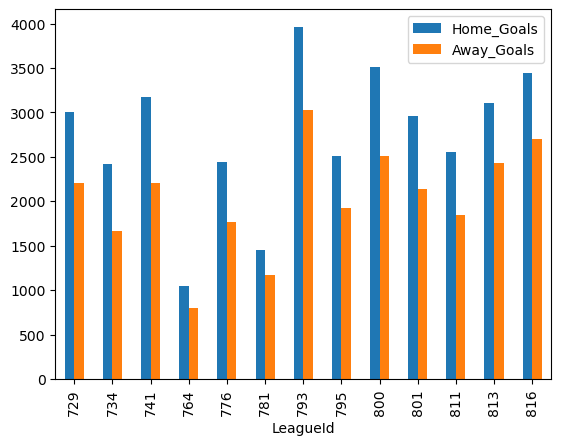

In [24]:
summary_goals_by_league.plot.bar()
plt.show()

In [25]:
summary_corners_by_league = df_all.groupby('LeagueId').agg(
    {
        'Home_Corners':'sum',
        'Away_Corners':'sum',
    }
)

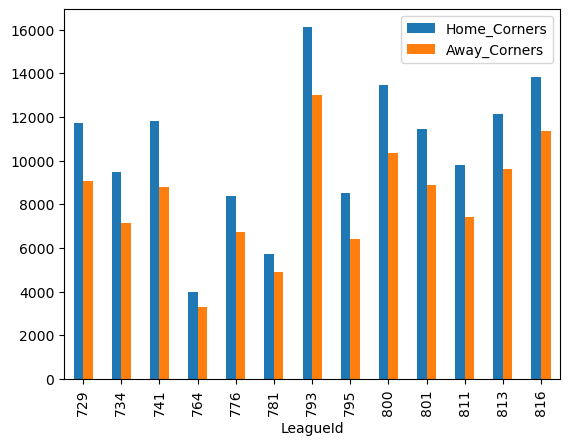

In [26]:
summary_corners_by_league.plot.bar()
plt.show()

A clear home advantage. As we are predicting the total corners, lets see how its actually distributed, total corners in a game is an integer, it suggests a Poisson distribution. Lets look at the statistics and see.

In [27]:
df_all['Total_Corners'].describe()

count    23822.000000
mean        10.219335
std          3.450849
min          0.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         25.000000
Name: Total_Corners, dtype: float64

In [28]:
df_all['Total_Corners'].std()**2/df_all['Total_Corners'].mean()

1.1652770959545595

Slightly overdispersed the ratio is 1.16 and so we can still get away with using a Poisson distribution but I guess if we would like to capture longer tail we might want to use a Negative Binomial distribution

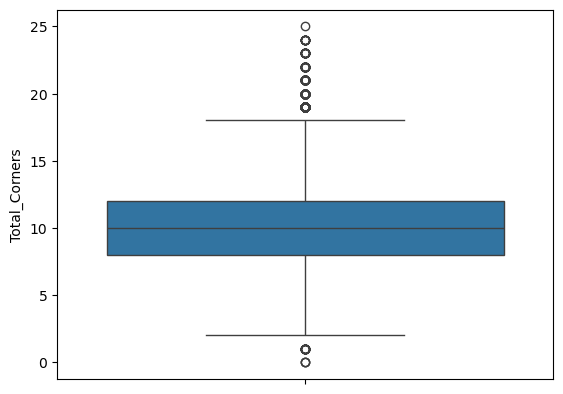

In [29]:
sns.boxplot(df_all['Total_Corners'])
plt.show()

I want to see how the games are played and will plot the dates

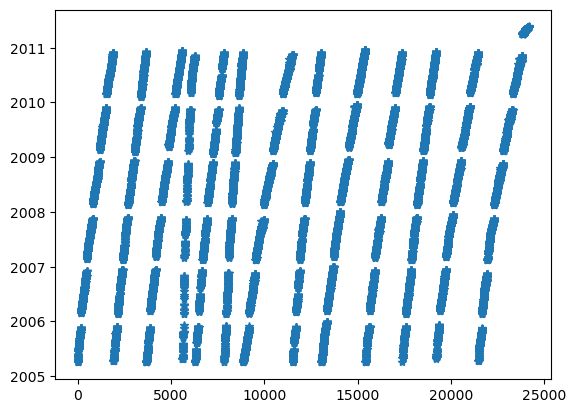

In [30]:
plt.plot(df_all["Date"],'*')
plt.show()

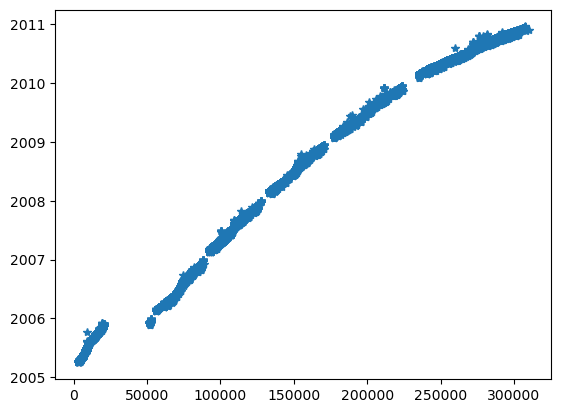

In [31]:
plt.plot(df_train["MatchId"], df_train["Date"],'*')
plt.show()

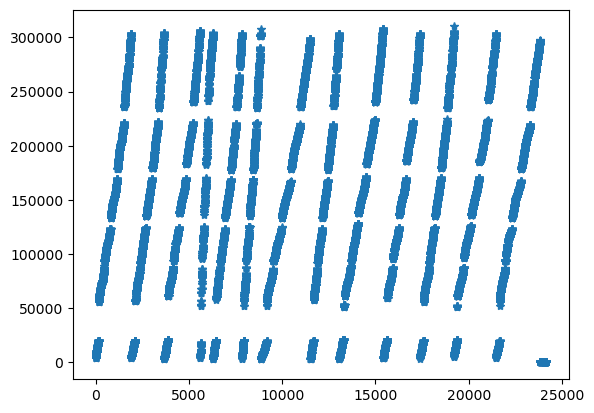

In [32]:
plt.plot(df_all["MatchId"],'*')
plt.show()

There seems to be clear separation between seasons, I wonder if we can get the season boundaries

So I guess these season boundaries are league specific and one needs to take that into account.

In [33]:
df_all = df_all.sort_values(
    ['LeagueId', 'Date', 'MatchId'],
    kind='mergesort' 
).reset_index(drop=True)

In [34]:
df_all['Day_Diff'] = df_all.groupby('LeagueId')['Date'].diff().dt.days

df_all['Day_Diff'].describe()

count    24150.000000
mean         1.159669
std          5.662453
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        146.000000
Name: Day_Diff, dtype: float64

Now we see that the separation is max 146 days. Lets see what to do about it. May be lets assign season ids. Lets have a gap threshold of say 60 days

In [35]:
gap = 60.0
df_all['new_season'] = df_all['Day_Diff'].gt(gap).fillna(False)

df_all['new_season']

0        False
1        False
2        False
3        False
4        False
         ...  
24158    False
24159    False
24160    False
24161    False
24162    False
Name: new_season, Length: 24163, dtype: bool

In [36]:
df_all['SeasonId'] = df_all.groupby(['LeagueId'])['new_season'].cumsum()
df_all['SeasonId']

0        0
1        0
2        0
3        0
4        0
        ..
24158    5
24159    5
24160    5
24161    5
24162    5
Name: SeasonId, Length: 24163, dtype: int64

In [37]:
df_all['SeasonId'].max()


6

So there are 7 seasons I see

In [38]:
df_all

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,Bet (U/O),Stake,Total_Corners,Total_Goals,Win,Draw,Loss,Day_Diff,new_season,SeasonId
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,10.0,0.0,0,1,0,NaN,False,0
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,NaN,8.0,4.0,0,1,0,0.0,False,0
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,NaN,8.0,5.0,1,0,0,0.0,False,0
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,NaN,7.0,6.0,0,1,0,0.0,False,0
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,NaN,8.0,2.0,1,0,0,1.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24158,296374,816,2010-11-06,654,486,3.0,2.0,6.0,3.0,False,...,NaN,NaN,9.0,5.0,1,0,0,0.0,False,5
24159,296375,816,2010-11-06,419,197,1.0,1.0,5.0,3.0,False,...,NaN,NaN,8.0,2.0,0,1,0,0.0,False,5
24160,296376,816,2010-11-06,448,312,3.0,2.0,4.0,5.0,False,...,NaN,NaN,9.0,5.0,1,0,0,0.0,False,5
24161,296377,816,2010-11-06,1016,998,0.0,0.0,5.0,4.0,False,...,NaN,NaN,9.0,0.0,0,1,0,0.0,False,5


In [39]:
df_all = df_all.sort_values(
    ['LeagueId', 'SeasonId', 'Date', 'MatchId'],
    kind='mergesort'
).reset_index(drop=True)
df_all.head(5)

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,Bet (U/O),Stake,Total_Corners,Total_Goals,Win,Draw,Loss,Day_Diff,new_season,SeasonId
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,10.0,0.0,0,1,0,NaN,False,0
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,NaN,8.0,4.0,0,1,0,0.0,False,0
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,NaN,8.0,5.0,1,0,0,0.0,False,0
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,NaN,7.0,6.0,0,1,0,0.0,False,0
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,NaN,8.0,2.0,1,0,0,1.0,False,0


Lets think about what features we might need for predicting the total corners for the games in the test set.

I would personally like to have a recent performance (last 5 games) home team goals scored and corners scored average at home and away team goals scored and corners scored average while they were away. I believe teams that have a good recent performance would have a good confidence and might have higher possession in the coming games. We will reset this after every season

I then would like to create a cumulative average of home team goals scored and conceded along with away team goals scored and conceded and the same for the corners. We will reset this after every season.

I will also create a score of the home team and away team. We will reset this after every season.

In [40]:
df_all['Home_Goals_Conceded'] = df_all['Away_Goals']
df_all['Home_Corners_Conceded'] = df_all['Away_Corners']
df_all['Away_Goals_Conceded'] = df_all['Home_Goals']
df_all['Away_Corners_Conceded'] = df_all['Home_Corners']

In [41]:
df_all

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,Win,Draw,Loss,Day_Diff,new_season,SeasonId,Home_Goals_Conceded,Home_Corners_Conceded,Away_Goals_Conceded,Away_Corners_Conceded
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,0,1,0,NaN,False,0,0.0,2.0,0.0,8.0
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,0,1,0,0.0,False,0,2.0,2.0,2.0,6.0
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,1,0,0,0.0,False,0,0.0,4.0,5.0,4.0
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,0,1,0,0.0,False,0,3.0,2.0,3.0,5.0
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,1,0,0,1.0,False,0,0.0,2.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24158,296374,816,2010-11-06,654,486,3.0,2.0,6.0,3.0,False,...,1,0,0,0.0,False,5,2.0,3.0,3.0,6.0
24159,296375,816,2010-11-06,419,197,1.0,1.0,5.0,3.0,False,...,0,1,0,0.0,False,5,1.0,3.0,1.0,5.0
24160,296376,816,2010-11-06,448,312,3.0,2.0,4.0,5.0,False,...,1,0,0,0.0,False,5,2.0,5.0,3.0,4.0
24161,296377,816,2010-11-06,1016,998,0.0,0.0,5.0,4.0,False,...,0,1,0,0.0,False,5,0.0,4.0,0.0,5.0


Let us first calculate cumulative averages for each team across each league 

In [42]:
def expanding_means(df, keys, value_col, out_col):
    df = df.sort_values(keys + ['Date', 'MatchId'], kind='mergesort').copy()
    g = df.groupby(keys, sort=False)
    cnt = g.cumcount()
    csum = g[value_col].cumsum()
    df[out_col] = np.where(cnt > 0, (csum - df[value_col]) / cnt, np.nan)
    return df

In [43]:
df_all = expanding_means(df_all, ['LeagueId','SeasonId','HomeTeamId'], 'Home_Corners', 'HomeTeamSeason_CumHomeCornersAvg')
df_all = expanding_means(df_all, ['LeagueId','SeasonId','HomeTeamId'], 'Away_Corners', 'HomeTeamSeason_CumAwayCornersAvg')
df_all = expanding_means(df_all, ['LeagueId','SeasonId','AwayTeamId'], 'Away_Corners', 'AwayTeamSeason_CumAwayCornersAvg')
df_all = expanding_means(df_all, ['LeagueId','SeasonId','AwayTeamId'], 'Home_Corners', 'AwayTeamSeason_CumHomeCornersAvg')

In [44]:
df_all = expanding_means(df_all, ['LeagueId','HomeTeamId'], 'Home_Corners', 'HomeTeam_CumHomeCornersAvg')
df_all = expanding_means(df_all, ['LeagueId','HomeTeamId'], 'Away_Corners', 'HomeTeam_CumAwayCornersAvg')
df_all = expanding_means(df_all, ['LeagueId','AwayTeamId'], 'Away_Corners', 'AwayTeam_CumAwayCornersAvg')
df_all = expanding_means(df_all, ['LeagueId','AwayTeamId'], 'Home_Corners', 'AwayTeam_CumHomeCornersAvg')

In [45]:
df_all.sort_values(['LeagueId','SeasonId','Date','MatchId'], kind='mergesort').head()


,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,Away_Goals_Conceded,Away_Corners_Conceded,HomeTeamSeason_CumHomeCornersAvg,HomeTeamSeason_CumAwayCornersAvg,AwayTeamSeason_CumAwayCornersAvg,AwayTeamSeason_CumHomeCornersAvg,HomeTeam_CumHomeCornersAvg,HomeTeam_CumAwayCornersAvg,AwayTeam_CumAwayCornersAvg,AwayTeam_CumHomeCornersAvg
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now recent performances

In [46]:
def rolling_means(df, keys, value_col, out_col):
    df = df.sort_values(keys + ['Date', 'MatchId'], kind='mergesort').copy()
    res = (df.groupby(keys, sort=False)[value_col]
             .apply(lambda s: s.shift(1).rolling(window = 5, min_periods=1).mean()))
    df[out_col] = res.to_numpy()
    return df

In [47]:
df_all = rolling_means(df_all, ['LeagueId','SeasonId','HomeTeamId'], 'Home_Corners', 'HomeTeamSeason_rollHomeCornersAvg')
df_all = rolling_means(df_all, ['LeagueId','SeasonId','HomeTeamId'], 'Away_Corners', 'HomeTeamSeason_rollAwayCornersAvg')
df_all = rolling_means(df_all, ['LeagueId','SeasonId','AwayTeamId'], 'Away_Corners', 'AwayTeamSeason_rollAwayCornersAvg')
df_all = rolling_means(df_all, ['LeagueId','SeasonId','AwayTeamId'], 'Home_Corners', 'AwayTeamSeason_rollHomeCornersAvg')

In [48]:
df_all = rolling_means(df_all, ['LeagueId','HomeTeamId'], 'Home_Corners', 'HomeTeam_rollHomeCornersAvg')
df_all = rolling_means(df_all, ['LeagueId','HomeTeamId'], 'Away_Corners', 'HomeTeam_rollAwayCornersAvg')
df_all = rolling_means(df_all, ['LeagueId','AwayTeamId'], 'Away_Corners', 'AwayTeam_rollAwayCornersAvg')
df_all = rolling_means(df_all, ['LeagueId','AwayTeamId'], 'Home_Corners', 'AwayTeam_rollHomeCornersAvg')

In [49]:
df_all.sort_values(['LeagueId','SeasonId','Date','MatchId'])


,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,AwayTeam_CumAwayCornersAvg,AwayTeam_CumHomeCornersAvg,HomeTeamSeason_rollHomeCornersAvg,HomeTeamSeason_rollAwayCornersAvg,AwayTeamSeason_rollAwayCornersAvg,AwayTeamSeason_rollHomeCornersAvg,HomeTeam_rollHomeCornersAvg,HomeTeam_rollAwayCornersAvg,AwayTeam_rollAwayCornersAvg,AwayTeam_rollHomeCornersAvg
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24158,296374,816,2010-11-06,654,486,3.0,2.0,6.0,3.0,False,...,3.927083,6.187500,7.0,2.8,4.8,4.2,7.0,2.8,4.8,4.2
24159,296375,816,2010-11-06,419,197,1.0,1.0,5.0,3.0,False,...,4.484536,5.752577,6.8,4.4,4.0,6.0,6.8,4.4,4.0,6.0
24160,296376,816,2010-11-06,448,312,3.0,2.0,4.0,5.0,False,...,4.095238,6.809524,5.0,6.4,2.8,6.4,5.0,6.4,2.8,6.4
24161,296377,816,2010-11-06,1016,998,0.0,0.0,5.0,4.0,False,...,4.883721,6.139535,6.0,5.0,3.4,4.0,6.0,5.0,3.4,4.0


Now lets create a head2head average. Here we just have home team's home and away team's away

In [50]:
def h2h_expanding(df, group_cols, value_col, out_col):
    #group_cols = ['LeagueId', 'SeasonId', 'HomeTeamId', 'AwayTeamId']
    df = df.sort_values(group_cols + ['Date', 'MatchId'], kind='mergesort').copy()
    g = df.groupby(group_cols, sort=False)
    val = df[value_col]
    cnt_prev  = g[value_col].apply(lambda s: s.notna().cumsum()).to_numpy() - val.notna().astype(int)
    csum_prev = g[value_col].apply(lambda s: s.fillna(0).cumsum()).to_numpy() - val.fillna(0).to_numpy()

    with np.errstate(invalid='ignore', divide='ignore'):
        prior_mean = np.where(cnt_prev > 0, csum_prev / cnt_prev, np.nan)

    df[out_col] = prior_mean
    return df

In [51]:
df_all = h2h_expanding(df_all, ['LeagueId', 'SeasonId', 'HomeTeamId', 'AwayTeamId'],'Home_Corners', 'h2hHomeSeason_CornersAvg')
df_all = h2h_expanding(df_all, ['LeagueId', 'SeasonId', 'HomeTeamId', 'AwayTeamId'],'Away_Corners', 'h2hAwaySeason_CornersAvg')
df_all = h2h_expanding(df_all, ['LeagueId', 'SeasonId', 'HomeTeamId', 'AwayTeamId'],'Home_Goals', 'h2hHomeSeason_GoalsAvg')
df_all = h2h_expanding(df_all, ['LeagueId', 'SeasonId', 'HomeTeamId', 'AwayTeamId'],'Away_Goals', 'h2hAwaySeason_GoalsAvg')

In [52]:
df_all = h2h_expanding(df_all, ['LeagueId',  'HomeTeamId', 'AwayTeamId'],'Home_Corners', 'h2hHome_CornersAvg')
df_all = h2h_expanding(df_all, ['LeagueId',  'HomeTeamId', 'AwayTeamId'],'Away_Corners', 'h2hAway_CornersAvg')
df_all = h2h_expanding(df_all, ['LeagueId',  'HomeTeamId', 'AwayTeamId'],'Home_Goals', 'h2hHome_GoalsAvg')
df_all = h2h_expanding(df_all, ['LeagueId',  'HomeTeamId', 'AwayTeamId'],'Away_Goals', 'h2hAway_GoalsAvg')

In [53]:
df_all = df_all.sort_values(['LeagueId','SeasonId', 'Date', 'MatchId'], kind='mergesort')
df_all.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,AwayTeam_rollAwayCornersAvg,AwayTeam_rollHomeCornersAvg,h2hHomeSeason_CornersAvg,h2hAwaySeason_CornersAvg,h2hHomeSeason_GoalsAvg,h2hAwaySeason_GoalsAvg,h2hHome_CornersAvg,h2hAway_CornersAvg,h2hHome_GoalsAvg,h2hAway_GoalsAvg
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_all.tail()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,AwayTeam_rollAwayCornersAvg,AwayTeam_rollHomeCornersAvg,h2hHomeSeason_CornersAvg,h2hAwaySeason_CornersAvg,h2hHomeSeason_GoalsAvg,h2hAwaySeason_GoalsAvg,h2hHome_CornersAvg,h2hAway_CornersAvg,h2hHome_GoalsAvg,h2hAway_GoalsAvg
24158,296374,816,2010-11-06,654,486,3.0,2.0,6.0,3.0,False,...,4.8,4.2,NaN,NaN,NaN,NaN,9.00,5.00,3.00,2.0
24159,296375,816,2010-11-06,419,197,1.0,1.0,5.0,3.0,False,...,4.0,6.0,NaN,NaN,NaN,NaN,5.25,2.75,1.25,1.5
24160,296376,816,2010-11-06,448,312,3.0,2.0,4.0,5.0,False,...,2.8,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24161,296377,816,2010-11-06,1016,998,0.0,0.0,5.0,4.0,False,...,3.4,4.0,NaN,NaN,NaN,NaN,4.00,2.00,2.00,1.0
24162,296378,816,2010-11-06,1316,662,0.0,2.0,8.0,4.0,False,...,3.6,9.6,NaN,NaN,NaN,NaN,5.00,5.00,3.00,1.0


Lets have a score for teams cumulative for each season

In [55]:
df_all.groupby(['LeagueId', 'SeasonId', 'HomeTeamId'])['Win'].cumsum()

0         0
1         0
2         1
3         0
4         1
         ..
24158     6
24159    13
24160     9
24161     8
24162     7
Name: Win, Length: 24163, dtype: int64

Now I believe we can calculate win, draw and loss rates h2h

In [56]:
df_all = h2h_expanding(df_all, ['LeagueId', 'SeasonId', 'HomeTeamId', 'AwayTeamId'], 'Win', 'h2hHomeSeason_winrate')
df_all = h2h_expanding(df_all, ['LeagueId', 'SeasonId', 'HomeTeamId', 'AwayTeamId'], 'Draw', 'h2hHomeSeason_drawrate')
df_all = h2h_expanding(df_all, ['LeagueId', 'SeasonId', 'HomeTeamId', 'AwayTeamId'], 'Loss', 'h2hHomeSeason_lossrate')

In [57]:
df_all = h2h_expanding(df_all, ['LeagueId', 'HomeTeamId', 'AwayTeamId'], 'Win', 'h2hHome_winrate')
df_all = h2h_expanding(df_all, ['LeagueId', 'HomeTeamId', 'AwayTeamId'], 'Draw', 'h2hHome_drawrate')
df_all = h2h_expanding(df_all, ['LeagueId', 'HomeTeamId', 'AwayTeamId'], 'Loss', 'h2hHome_lossrate')

In [58]:
df_all = df_all.sort_values(['LeagueId','SeasonId', 'Date', 'MatchId'], kind='mergesort')
df_all.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,h2hHome_CornersAvg,h2hAway_CornersAvg,h2hHome_GoalsAvg,h2hAway_GoalsAvg,h2hHomeSeason_winrate,h2hHomeSeason_drawrate,h2hHomeSeason_lossrate,h2hHome_winrate,h2hHome_drawrate,h2hHome_lossrate
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us now get cumulative points of a team after each game.


In [59]:
def cumulative_points(df, team_col, win_col, draw_col, out_col):
    df = df.sort_values(['LeagueId','SeasonId', team_col, 'Date','MatchId'],
                        kind='mergesort').copy()

    # Points per row; NaNs propagate (test rows should be NaN)
    pts = 3.0 * df[win_col].astype(float) + 1.0 * df[draw_col].astype(float)
    df['_pts'] = pts
    df['_obs'] = df['_pts'].notna().astype(int)

    g = df.groupby(['LeagueId','SeasonId', team_col], sort=False)

    # Cumulative counts/sums that preserve the original index
    obs_cum  = g['_obs'].transform('cumsum')
    pts_cum  = g['_pts'].transform(lambda s: s.fillna(0).cumsum())

    # Prior (exclude current row)
    cnt_prev  = obs_cum - df['_obs']
    csum_prev = pts_cum - df['_pts'].fillna(0)

    with np.errstate(invalid='ignore', divide='ignore'):
        df[out_col] = np.where(cnt_prev > 0, csum_prev / cnt_prev, np.nan)

    return df.drop(columns=['_pts','_obs'])


In [60]:
df_all = cumulative_points(df_all, 'HomeTeamId', 'Win', 'Draw', 'HomeTeam_CumPoints')
df_all = cumulative_points(df_all, 'AwayTeamId', 'Loss', 'Draw', 'AwayTeam_CumPoints')

In [61]:
df_all = df_all.sort_values(['LeagueId','SeasonId', 'Date', 'MatchId'], kind='mergesort')
df_all.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,h2hHome_GoalsAvg,h2hAway_GoalsAvg,h2hHomeSeason_winrate,h2hHomeSeason_drawrate,h2hHomeSeason_lossrate,h2hHome_winrate,h2hHome_drawrate,h2hHome_lossrate,HomeTeam_CumPoints,AwayTeam_CumPoints
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now recent performances as well

In [62]:
def rolling_rate(df, season, team_col, result_col, out_col, window=5):
    if season:
      df = df.sort_values(['LeagueId','SeasonId', team_col, 'Date','MatchId'], kind='mergesort').copy()
    else:
      df = df.sort_values(['LeagueId', team_col, 'Date','MatchId'], kind='mergesort').copy() 
    res = (
        df.groupby(['LeagueId','SeasonId', team_col], sort=False)[result_col]
          .apply(lambda s: s.shift(1).rolling(window, min_periods=1).mean())
    )
    df[out_col] = res.to_numpy()
    return df

In [63]:
# Home recent performance
df_all = rolling_rate(df_all, True, 'HomeTeamId', 'Win',  'HomeTeamSeason_RecentWinRate',  window=5)
df_all = rolling_rate(df_all, True, 'HomeTeamId', 'Draw', 'HomeTeamSeason_RecentDrawRate', window=5)
df_all = rolling_rate(df_all, True, 'HomeTeamId', 'Loss', 'HomeTeamSeason_RecentLossRate', window=5)

# Away recent performance
df_all = rolling_rate(df_all, True, 'AwayTeamId', 'Loss',  'AwayTeamSeason_RecentWinRate',  window=5)
df_all = rolling_rate(df_all, True, 'AwayTeamId', 'Draw', 'AwayTeamSeason_RecentDrawRate', window=5)
df_all = rolling_rate(df_all, True, 'AwayTeamId', 'Win', 'AwayTeamSeason_RecentLossRate', window=5)

In [64]:
# Home recent performance
df_all = rolling_rate(df_all, False, 'HomeTeamId', 'Win',  'HomeTeam_RecentWinRate',  window=5)
df_all = rolling_rate(df_all, False, 'HomeTeamId', 'Draw', 'HomeTeam_RecentDrawRate', window=5)
df_all = rolling_rate(df_all, False, 'HomeTeamId', 'Loss', 'HomeTeam_RecentLossRate', window=5)

# Away recent performance
df_all = rolling_rate(df_all, False, 'AwayTeamId', 'Loss',  'AwayTeam_RecentWinRate',  window=5)
df_all = rolling_rate(df_all, False, 'AwayTeamId', 'Draw', 'AwayTeam_RecentDrawRate', window=5)
df_all = rolling_rate(df_all, False, 'AwayTeamId', 'Win', 'AwayTeam_RecentLossRate', window=5)

In [65]:
df_all = df_all.sort_values(['LeagueId','SeasonId', 'Date', 'MatchId'], kind='mergesort')
df_all.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,HomeTeamSeason_RecentLossRate,AwayTeamSeason_RecentWinRate,AwayTeamSeason_RecentDrawRate,AwayTeamSeason_RecentLossRate,HomeTeam_RecentWinRate,HomeTeam_RecentDrawRate,HomeTeam_RecentLossRate,AwayTeam_RecentWinRate,AwayTeam_RecentDrawRate,AwayTeam_RecentLossRate
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us now create league specific features

In [66]:
df_all = expanding_means(df_all, ['LeagueId','SeasonId'], 'Home_Corners', 'LeagueSeason_CumHomeCornersAvg')
df_all = expanding_means(df_all, ['LeagueId','SeasonId'], 'Away_Corners', 'LeagueSeason_CumAwayCornersAvg')
df_all = expanding_means(df_all, ['LeagueId','SeasonId'], 'Away_Goals', 'LeagueSeason_CumAwayGoalsAvg')
df_all = expanding_means(df_all, ['LeagueId','SeasonId'], 'Home_Goals', 'LeagueSeason_CumHomeGoalsAvg')

In [67]:
df_all = expanding_means(df_all, ['LeagueId'], 'Home_Corners', 'League_CumHomeCornersAvg')
df_all = expanding_means(df_all, ['LeagueId'], 'Away_Corners', 'League_CumAwayCornersAvg')
df_all = expanding_means(df_all, ['LeagueId'], 'Away_Goals', 'League_CumAwayGoalsAvg')
df_all = expanding_means(df_all, ['LeagueId'], 'Home_Goals', 'League_CumHomeGoalsAvg')

In [68]:
df_all

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,AwayTeam_RecentDrawRate,AwayTeam_RecentLossRate,LeagueSeason_CumHomeCornersAvg,LeagueSeason_CumAwayCornersAvg,LeagueSeason_CumAwayGoalsAvg,LeagueSeason_CumHomeGoalsAvg,League_CumHomeCornersAvg,League_CumAwayCornersAvg,League_CumAwayGoalsAvg,League_CumHomeGoalsAvg
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,NaN,8.000000,2.000000,0.000000,0.000000,8.000000,2.000000,0.000000,0.000000
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,NaN,7.000000,2.000000,1.000000,1.000000,7.000000,2.000000,1.000000,1.000000
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,NaN,6.000000,2.666667,0.666667,2.333333,6.000000,2.666667,0.666667,2.333333
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,NaN,5.750000,2.500000,1.250000,2.500000,5.750000,2.500000,1.250000,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24158,296374,816,2010-11-06,654,486,3.0,2.0,6.0,3.0,False,...,0.4,0.2,5.826590,4.820809,1.132948,1.356455,5.886141,4.842644,1.149254,1.463539
24159,296375,816,2010-11-06,419,197,1.0,1.0,5.0,3.0,False,...,0.2,0.6,5.826923,4.817308,1.134615,1.359615,5.886189,4.841858,1.149616,1.464194
24160,296376,816,2010-11-06,448,312,3.0,2.0,4.0,5.0,False,...,0.4,0.4,5.825336,4.813820,1.134357,1.358925,5.885812,4.841074,1.149553,1.463997
24161,296377,816,2010-11-06,1016,998,0.0,0.0,5.0,4.0,False,...,0.2,0.6,5.821839,4.814176,1.136015,1.362069,5.885009,4.841141,1.149915,1.464651


In [69]:
df_all['Day_Of_Week'] = df_all['Date'].dt.day_of_week

In [70]:
df_train2 = df_all[~df_all['Is_Test']]
df_train2.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,AwayTeam_RecentLossRate,LeagueSeason_CumHomeCornersAvg,LeagueSeason_CumAwayCornersAvg,LeagueSeason_CumAwayGoalsAvg,LeagueSeason_CumHomeGoalsAvg,League_CumHomeCornersAvg,League_CumAwayCornersAvg,League_CumAwayGoalsAvg,League_CumHomeGoalsAvg,Day_Of_Week
0,3784,729,2005-04-02,1740,396,0.0,0.0,8.0,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,3785,729,2005-04-02,974,1193,2.0,2.0,6.0,2.0,False,...,NaN,8.00,2.000000,0.000000,0.000000,8.00,2.000000,0.000000,0.000000,5
2,3786,729,2005-04-02,1118,1237,5.0,0.0,4.0,4.0,False,...,NaN,7.00,2.000000,1.000000,1.000000,7.00,2.000000,1.000000,1.000000,5
3,3787,729,2005-04-02,912,445,3.0,3.0,5.0,2.0,False,...,NaN,6.00,2.666667,0.666667,2.333333,6.00,2.666667,0.666667,2.333333,5
4,3790,729,2005-04-03,1741,297,2.0,0.0,6.0,2.0,False,...,NaN,5.75,2.500000,1.250000,2.500000,5.75,2.500000,1.250000,2.500000,6


In [71]:
df_train2.tail(10)

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,AwayTeam_RecentLossRate,LeagueSeason_CumHomeCornersAvg,LeagueSeason_CumAwayCornersAvg,LeagueSeason_CumAwayGoalsAvg,LeagueSeason_CumHomeGoalsAvg,League_CumHomeCornersAvg,League_CumAwayCornersAvg,League_CumAwayGoalsAvg,League_CumHomeGoalsAvg,Day_Of_Week
24153,296369,816,2010-11-06,1107,1090,2.0,2.0,5.0,2.0,False,...,0.6,5.830739,4.828794,1.130350,1.350195,5.887179,4.844444,1.148718,1.462393,5
24154,296370,816,2010-11-06,830,807,4.0,1.0,9.0,7.0,False,...,0.8,5.829126,4.823301,1.132039,1.351456,5.886801,4.843229,1.149082,1.462623,5
24155,296371,816,2010-11-06,994,1438,2.0,0.0,5.0,3.0,False,...,0.0,5.835271,4.827519,1.131783,1.356589,5.888130,4.844150,1.149018,1.463706,5
24156,296372,816,2010-11-06,2197,741,2.0,2.0,4.0,2.0,False,...,0.8,5.833656,4.823985,1.129594,1.357834,5.887751,4.843363,1.148528,1.463935,5
24157,296373,816,2010-11-06,2018,1415,0.0,2.0,4.0,6.0,False,...,0.4,5.830116,4.818533,1.131274,1.359073,5.886945,4.842150,1.148891,1.464164,5
24158,296374,816,2010-11-06,654,486,3.0,2.0,6.0,3.0,False,...,0.2,5.826590,4.820809,1.132948,1.356455,5.886141,4.842644,1.149254,1.463539,5
24159,296375,816,2010-11-06,419,197,1.0,1.0,5.0,3.0,False,...,0.6,5.826923,4.817308,1.134615,1.359615,5.886189,4.841858,1.149616,1.464194,5
24160,296376,816,2010-11-06,448,312,3.0,2.0,4.0,5.0,False,...,0.4,5.825336,4.813820,1.134357,1.358925,5.885812,4.841074,1.149553,1.463997,5
24161,296377,816,2010-11-06,1016,998,0.0,0.0,5.0,4.0,False,...,0.6,5.821839,4.814176,1.136015,1.362069,5.885009,4.841141,1.149915,1.464651,5
24162,296378,816,2010-11-06,1316,662,0.0,2.0,8.0,4.0,False,...,0.2,5.820268,4.812620,1.133843,1.359465,5.884632,4.840783,1.149425,1.464027,5


In [72]:
df_test2 = df_all[df_all['Is_Test']]
df_test2.head(20)

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,AwayTeam_RecentLossRate,LeagueSeason_CumHomeCornersAvg,LeagueSeason_CumAwayCornersAvg,LeagueSeason_CumAwayGoalsAvg,LeagueSeason_CumHomeGoalsAvg,League_CumHomeCornersAvg,League_CumAwayCornersAvg,League_CumAwayGoalsAvg,League_CumHomeGoalsAvg,Day_Of_Week
1911,3,729,2011-04-01,691,1137,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1912,4,729,2011-04-01,787,808,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1913,11,729,2011-04-01,1412,1193,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1914,19,729,2011-04-01,1302,297,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1915,26,729,2011-04-01,601,1397,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1916,69,729,2011-04-09,912,787,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1917,70,729,2011-04-09,1741,445,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1918,71,729,2011-04-09,1211,1412,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1919,72,729,2011-04-09,1397,1302,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1920,73,729,2011-04-09,1364,691,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [73]:
df_test2.tail(10)

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,AwayTeam_RecentLossRate,LeagueSeason_CumHomeCornersAvg,LeagueSeason_CumAwayCornersAvg,LeagueSeason_CumAwayGoalsAvg,LeagueSeason_CumHomeGoalsAvg,League_CumHomeCornersAvg,League_CumAwayCornersAvg,League_CumAwayGoalsAvg,League_CumHomeGoalsAvg,Day_Of_Week
19545,270,811,2011-05-14,563,1382,NaN,NaN,NaN,NaN,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
19546,271,811,2011-05-14,353,232,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
19547,272,811,2011-05-14,2556,631,NaN,NaN,NaN,NaN,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
19548,279,811,2011-05-15,192,1165,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
19549,295,811,2011-05-20,1071,2556,NaN,NaN,NaN,NaN,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
19550,313,811,2011-05-21,1393,192,NaN,NaN,NaN,NaN,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
19551,318,811,2011-05-21,232,641,NaN,NaN,NaN,NaN,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
19552,319,811,2011-05-21,631,353,NaN,NaN,NaN,NaN,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
19553,320,811,2011-05-21,1361,1040,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
19554,335,811,2011-05-22,991,316,NaN,NaN,NaN,NaN,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


So finally we have split our training and test sets back by propagating the features. Let us also have a validation set to check for our performance. I will use season Id = 5 of each league as the validation set.

In [74]:
drop_cols = [
    'MatchId','Date',
    'HomeTeamId','AwayTeamId',  # unless you explicitly want IDs
    'Home_Corners','Away_Corners','Home_Goals','Away_Goals', # raw outcomes
    'Home_Goals_Conceded', 'Home_Corners_Conceded', 'Away_Goals_Conceded',
    'Away_Corners_Conceded', 
    'Win','Draw','Loss',        # raw labels
    'Line', 'LeagueId',
    'Over', 'Under', 'Unnamed: 8', 'P(Under)', 'P(At)', 'P(Over)',
    'Bet (U/O)', 'Stake', 'new_season', 'Is_Test', 'Day_Diff', 'Total_Corners', 'SeasonId'  # keep for betting, not as model inputs
]
feature_cols = [c for c in df_all.columns if c not in drop_cols]


In [75]:
print(feature_cols)

['Total_Goals', 'HomeTeamSeason_CumHomeCornersAvg', 'HomeTeamSeason_CumAwayCornersAvg', 'AwayTeamSeason_CumAwayCornersAvg', 'AwayTeamSeason_CumHomeCornersAvg', 'HomeTeam_CumHomeCornersAvg', 'HomeTeam_CumAwayCornersAvg', 'AwayTeam_CumAwayCornersAvg', 'AwayTeam_CumHomeCornersAvg', 'HomeTeamSeason_rollHomeCornersAvg', 'HomeTeamSeason_rollAwayCornersAvg', 'AwayTeamSeason_rollAwayCornersAvg', 'AwayTeamSeason_rollHomeCornersAvg', 'HomeTeam_rollHomeCornersAvg', 'HomeTeam_rollAwayCornersAvg', 'AwayTeam_rollAwayCornersAvg', 'AwayTeam_rollHomeCornersAvg', 'h2hHomeSeason_CornersAvg', 'h2hAwaySeason_CornersAvg', 'h2hHomeSeason_GoalsAvg', 'h2hAwaySeason_GoalsAvg', 'h2hHome_CornersAvg', 'h2hAway_CornersAvg', 'h2hHome_GoalsAvg', 'h2hAway_GoalsAvg', 'h2hHomeSeason_winrate', 'h2hHomeSeason_drawrate', 'h2hHomeSeason_lossrate', 'h2hHome_winrate', 'h2hHome_drawrate', 'h2hHome_lossrate', 'HomeTeam_CumPoints', 'AwayTeam_CumPoints', 'HomeTeamSeason_RecentWinRate', 'HomeTeamSeason_RecentDrawRate', 'HomeTeamSe

There are still quite a few nan values. Lets impute them.

In [76]:
train_means = df_train2[feature_cols].mean(numeric_only=True)
df_train2[feature_cols] = df_train2[feature_cols].fillna(train_means)
df_test2[feature_cols]  = df_test2[feature_cols].fillna(train_means)

/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/628741128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train2[feature_cols] = df_train2[feature_cols].fillna(train_means)
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/628741128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2[feature_cols]  = df_test2[feature_cols].fillna(train_means)


Let us now perform validation to select the model

In [77]:
last_season_mask = (df_train2.groupby('LeagueId')['SeasonId']
                        .transform(lambda s: s == 5))
X_tr = df_train2.loc[~last_season_mask, feature_cols]
y_tr = (df_train2['Total_Corners']).loc[~last_season_mask]

X_va = df_train2.loc[last_season_mask, feature_cols]
y_va = (df_train2['Total_Corners']).loc[last_season_mask]


Let us now fit the Poisson regression model

In [78]:
import statsmodels.api as sm

# X_tr, y_tr from your earlier split
X_tr_const = sm.add_constant(X_tr)  # statsmodels needs intercept term

# Poisson
po_model = sm.GLM(y_tr, X_tr_const, family=sm.families.Poisson()).fit()

# Negative Binomial
nb_model = sm.GLM(y_tr, X_tr_const, family=sm.families.NegativeBinomial()).fit()

# Compare
print("\nPoisson LogLik:", po_model.llf, "AIC:", po_model.aic)
print("NegBin LogLik:", nb_model.llf, "AIC:", nb_model.aic)

# Predict on validation set
X_va_const = sm.add_constant(X_va)
lambda_po = po_model.predict(X_va_const)
lambda_nb = nb_model.predict(X_va_const)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



Poisson LogLik: -49722.31511110245 AIC: 99534.6302222049
NegBin LogLik: -63863.50439835887 AIC: 127817.00879671774


In [79]:
rmse = np.sqrt(np.mean((lambda_po - y_va)**2))
mae  = np.mean(np.abs(lambda_po - y_va))
print(f"RMSE: {rmse:.3f}, MAE: {mae:.3f}")


RMSE: 3.456, MAE: 2.741


In [80]:
rmse = np.sqrt(np.mean((lambda_nb - y_va)**2))
mae  = np.mean(np.abs(lambda_nb - y_va))
print(f"RMSE: {rmse:.3f}, MAE: {mae:.3f}")


RMSE: 3.456, MAE: 2.741


The poisson likelihood is better than the negative binomial likelihood, so lets use Poisson and now get the predictions on the test set.

In [81]:
X_train = df_train2[feature_cols]
y_train = df_train2['Total_Corners']

In [82]:
X_train  = df_train2[feature_cols].astype(float)
X_test   = df_test2[feature_cols].astype(float)

X_train_const = sm.add_constant(X_train, has_constant='add')
X_test_const  = sm.add_constant(X_test,  has_constant='add')

train_cols = X_train_const.columns
X_test_const = X_test_const.reindex(columns=train_cols, fill_value=0.0)

po_model = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()

lambda_po = po_model.predict(X_test_const)

In [83]:
lambda_po

1911     10.097500
1912     10.144615
1913     10.311080
1914     10.247948
1915     10.072667
           ...    
19550     5.534676
19551     5.517370
19552     5.617164
19553     7.536154
19554     7.563730
Length: 341, dtype: float64

In [84]:

from scipy.stats import poisson

def poisson_probabilities(df, lambdapo):
    line = df['Line']

    # Probability exactly at the line (only if integer line)
    p_at = np.where(line % 1 == 0,
                    poisson.pmf(line.astype(int), lambda_po),
                    0)

    # Probability under = strictly less than line
    p_under = np.where(line % 1 == 0,
                    poisson.cdf(line.astype(int) - 1, lambda_po),
                    poisson.cdf(np.floor(line), lambda_po))

    # Probability over
    p_over = 1 - p_under - p_at

    df['P_Under'] = p_under
    df['P_At']    = p_at
    df['P_Over']  = p_over
    return df


In [85]:
df_test2 = poisson_probabilities(df_test2, lambda_po)

/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1544749438.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_Under'] = p_under
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1544749438.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_At']    = p_at
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1544749438.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [86]:
df_test2

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Is_Test,...,LeagueSeason_CumAwayGoalsAvg,LeagueSeason_CumHomeGoalsAvg,League_CumHomeCornersAvg,League_CumAwayCornersAvg,League_CumAwayGoalsAvg,League_CumHomeGoalsAvg,Day_Of_Week,P_Under,P_At,P_Over
1911,3,729,2011-04-01,691,1137,NaN,NaN,NaN,NaN,True,...,1.113352,1.48053,5.584797,4.354348,1.083674,1.48963,4,0.570843,0.000000,0.429157
1912,4,729,2011-04-01,787,808,NaN,NaN,NaN,NaN,True,...,1.113352,1.48053,5.584797,4.354348,1.083674,1.48963,4,0.564953,0.115262,0.319785
1913,11,729,2011-04-01,1412,1193,NaN,NaN,NaN,NaN,True,...,1.113352,1.48053,5.584797,4.354348,1.083674,1.48963,4,0.660902,0.000000,0.339098
1914,19,729,2011-04-01,1302,297,NaN,NaN,NaN,NaN,True,...,1.113352,1.48053,5.584797,4.354348,1.083674,1.48963,4,0.552050,0.116205,0.331745
1915,26,729,2011-04-01,601,1397,NaN,NaN,NaN,NaN,True,...,1.113352,1.48053,5.584797,4.354348,1.083674,1.48963,4,0.573949,0.114533,0.311518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19550,313,811,2011-05-21,1393,192,NaN,NaN,NaN,NaN,True,...,1.113352,1.48053,5.584797,4.354348,1.083674,1.48963,5,0.944404,0.029341,0.026255
19551,318,811,2011-05-21,232,641,NaN,NaN,NaN,NaN,True,...,1.113352,1.48053,5.584797,4.354348,1.083674,1.48963,5,0.945317,0.028933,0.025750
19552,319,811,2011-05-21,631,353,NaN,NaN,NaN,NaN,True,...,1.113352,1.48053,5.584797,4.354348,1.083674,1.48963,5,0.939918,0.031326,0.028756
19553,320,811,2011-05-21,1361,1040,NaN,NaN,NaN,NaN,True,...,1.113352,1.48053,5.584797,4.354348,1.083674,1.48963,5,0.772255,0.000000,0.227745


So we have now calculated the probabilities, let us calculate the expected value of profits using the probabilities and the odds

In [87]:
def ev_side(p_win, p_push, odds):
    p_loss = 1.0 - p_win - p_push
    return p_win * (odds - 1.0) - p_loss

For figuring out the stakes, let us use the kelly_fraction so that we are managing the risk in a better way

In [88]:
# Kelly fraction for a single outcome with push probability
def kelly_fraction(p_win, p_push, odds):
    b = odds - 1.0
    q = 1.0 - p_win - p_push  # true loss prob
    numer = p_win * b - q
    if b <= 0: 
        return 0.0
    f = numer / b
    return float(max(0.0, min(1.0, f)))  # clip to [0,1]

For each game, we now choose our bets, we decide on the stake based on a kelly_cut of 0.5 and cap it as well and then use that to calculate the expected values for profits and choose the one that has better returns

In [89]:
def choose_bet_row(row, kelly_cut=0.5, min_ev=0.02, per_game_cap_frac=0.02):
    pu, pa, po = row['P_Under'], row['P_At'], row['P_Over']
    ou, oo     = row['Under'], row['Over']  # ensure these are decimal odds
    line       = row['Line']

    ev_u = ev_side(pu, pa, ou)
    ev_o = ev_side(po, pa, oo)

    if (ev_u <= 0) and (ev_o <= 0):
        return pd.Series(['None', 0.0, 0.0])  # no bet: side, raw_frac, ev_per_unit

    # pick the better side
    if ev_o >= ev_u:
        side = f'Over {line}'
        pwin, odds, ev_per_unit = po, oo, ev_o
    else:
        side = f'Under {line}'
        pwin, odds, ev_per_unit = pu, ou, ev_u

    # edge threshold and odds sanity
    if (ev_per_unit < min_ev) or (odds <= 1.0) or not np.isfinite(ev_per_unit):
        return pd.Series(['None', 0.0, 0.0])

    # Kelly as FRACTION of bankroll, then clip & downscale
    f = kelly_fraction(pwin, pa, odds) * kelly_cut
    f = min(per_game_cap_frac, f)  # cap per game as fraction of bankroll

    return pd.Series([side, f, ev_per_unit])


Let us now calculate the bets

In [90]:

# Apply chooser -> returns fraction and per-unit EV
df_test2[['Bet_Selection','Stake_raw_frac','EV_per_unit']] = df_test2.apply(choose_bet_row, axis=1)

# 4) Allocate the full 341 bankroll proportionally to fractions
total_frac = df_test2.loc[df_test2['Stake_raw_frac'] > 0, 'Stake_raw_frac'].sum()
if total_frac > 0:
    df_test2['Stake'] = (df_test2['Stake_raw_frac'] / total_frac) * 341.0
else:
    df_test2['Stake'] = 0.0
df_test2['Stake'] = df_test2['Stake'].fillna(0.0)

# 5) Now compute TOTAL expected profit correctly
df_test2['EV_units'] = df_test2['Stake'] * df_test2['EV_per_unit']  # EV per match in units
total_stake = df_test2['Stake'].sum()
total_ev    = df_test2['EV_units'].sum()
roi         = total_ev / total_stake if total_stake > 0 else 0.0

/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/2758327668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2[['Bet_Selection','Stake_raw_frac','EV_per_unit']] = df_test2.apply(choose_bet_row, axis=1)
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/2758327668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2[['Bet_Selection','Stake_raw_frac','EV_per_unit']] = df_test2.apply(choose_bet_row, axis=1)
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykern

In [91]:
roi

0.6339236405167588

In [92]:
mean_ev   = df_test2['EV_units'].mean()
std_ev    = df_test2['EV_units'].std(ddof=1)  # sample std
sharpe_ev = mean_ev / std_ev if std_ev > 0 else np.nan
sharpe_ev

1.8570256018590827

So we have a Poisson baseline. Let us finetune the model and see what we can do

In [93]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=1e-3)
selector.fit(X_train)
low_var_cols = X_train.columns[~selector.get_support()]

In [94]:
low_var_cols

Index([], dtype='object')

In [95]:
# Compute correlation matrix
corr_matrix = X_train[feature_cols].corr().abs()

# Get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs above your threshold
threshold = 0.8
high_corr_pairs = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if not np.isnan(upper.loc[row, col]) and upper.loc[row, col] > threshold
]

# Sort by correlation descending
high_corr_pairs.sort(key=lambda x: -x[2])

for a, b, corr in high_corr_pairs:
    print(f"{a} ↔ {b}: {corr:.3f}")

HomeTeam_RecentWinRate ↔ HomeTeamSeason_RecentWinRate: 1.000
HomeTeam_RecentDrawRate ↔ HomeTeamSeason_RecentDrawRate: 1.000
HomeTeam_RecentLossRate ↔ HomeTeamSeason_RecentLossRate: 1.000
AwayTeam_RecentWinRate ↔ AwayTeamSeason_RecentWinRate: 1.000
AwayTeam_RecentDrawRate ↔ AwayTeamSeason_RecentDrawRate: 1.000
AwayTeam_RecentLossRate ↔ AwayTeamSeason_RecentLossRate: 1.000
HomeTeamSeason_rollAwayCornersAvg ↔ HomeTeamSeason_CumAwayCornersAvg: 0.899
AwayTeamSeason_rollAwayCornersAvg ↔ AwayTeamSeason_CumAwayCornersAvg: 0.899
AwayTeamSeason_rollHomeCornersAvg ↔ AwayTeamSeason_CumHomeCornersAvg: 0.897
HomeTeamSeason_rollHomeCornersAvg ↔ HomeTeamSeason_CumHomeCornersAvg: 0.896
HomeTeam_rollHomeCornersAvg ↔ HomeTeamSeason_rollHomeCornersAvg: 0.886
AwayTeam_rollHomeCornersAvg ↔ AwayTeamSeason_rollHomeCornersAvg: 0.882
HomeTeam_rollAwayCornersAvg ↔ HomeTeamSeason_rollAwayCornersAvg: 0.880
AwayTeam_rollAwayCornersAvg ↔ AwayTeamSeason_rollAwayCornersAvg: 0.878
HomeTeamSeason_RecentWinRate ↔ HomeTea

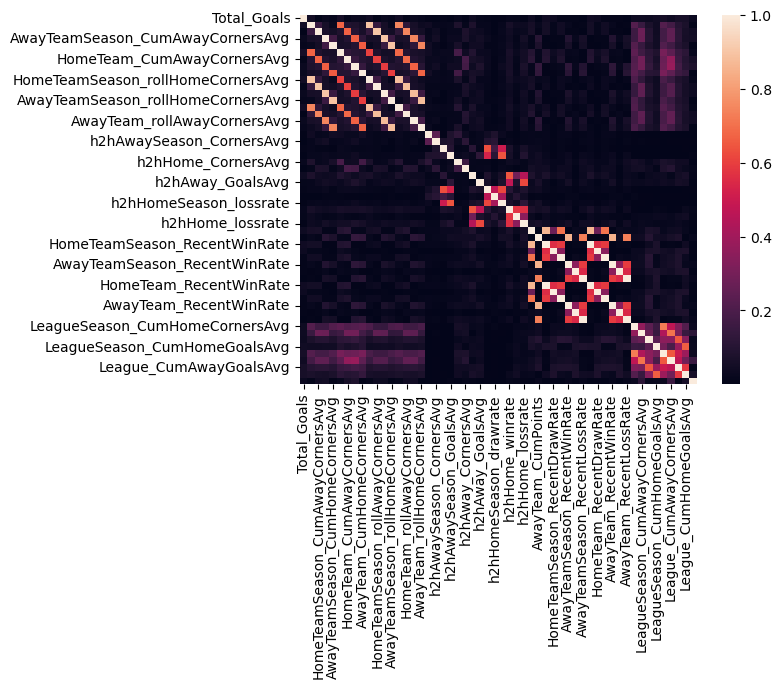

In [96]:
sns.heatmap(corr_matrix)
plt.show()

In [97]:
new_drop_cols = drop_cols + ['HomeTeamSeason_RecentWinRate', 'HomeTeamSeason_RecentLossRate', 'HomeTeamSeason_RecentDrawRate', 
                             'AwayTeamSeason_RecentLossRate','AwayTeamSeason_RecentDrawRate', 'AwayTeamSeason_RecentWinRate',
                             'HomeTeamSeason_CumAwayCornersAvg','HomeTeamSeason_CumHomeCornersAvg', 'AwayTeamSeason_CumAwayCornersAvg',
                             'AwayTeamSeason_CumHomeCornersAvg', 'HomeTeamSeason_rollHomeCornersAvg','HomeTeamSeason_rollAwayCornersAvg',
                             'AwayTeamSeason_rollHomeCornersAvg','AwayTeamSeason_rollAwayCornersAvg','HomeTeamSeason_RecentWinRate',
                             'AwayTeamSeason_RecentWinRate', 'AwayTeam_WinRate','HomeTeam_WinRate']
new_feature_cols = [c for c in df_all.columns if c not in new_drop_cols]

Lets rerun validation to see if there are any changes

In [98]:
train_means = df_train2[new_feature_cols].mean(numeric_only=True)
df_train2[new_feature_cols] = df_train2[new_feature_cols].fillna(train_means)
df_test2[new_feature_cols]  = df_test2[new_feature_cols].fillna(train_means)

/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/143506290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train2[new_feature_cols] = df_train2[new_feature_cols].fillna(train_means)
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/143506290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2[new_feature_cols]  = df_test2[new_feature_cols].fillna(train_means)


In [99]:
last_season_mask = (df_train2.groupby('LeagueId')['SeasonId']
                        .transform(lambda s: s == 5))
X_tr = df_train2.loc[~last_season_mask, new_feature_cols]
y_tr = (df_train2['Total_Corners']).loc[~last_season_mask]

X_va = df_train2.loc[last_season_mask, new_feature_cols]
y_va = (df_train2['Total_Corners']).loc[last_season_mask]


In [100]:
# X_tr, y_tr from your earlier split
X_tr_const = sm.add_constant(X_tr)  # statsmodels needs intercept term

# Poisson
po_model = sm.GLM(y_tr, X_tr_const, family=sm.families.Poisson()).fit()

# Negative Binomial
nb_model = sm.GLM(y_tr, X_tr_const, family=sm.families.NegativeBinomial()).fit()

# Compare
print("\nPoisson LogLik:", po_model.llf, "AIC:", po_model.aic)
print("NegBin LogLik:", nb_model.llf, "AIC:", nb_model.aic)

# Predict on validation set
X_va_const = sm.add_constant(X_va)
lambda_po = po_model.predict(X_va_const)
lambda_nb = nb_model.predict(X_va_const)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



Poisson LogLik: -49729.23221831537 AIC: 99532.46443663073
NegBin LogLik: -63864.140069400426 AIC: 127802.28013880085


In [101]:
rmse = np.sqrt(np.mean((lambda_po - y_va)**2))
mae  = np.mean(np.abs(lambda_po - y_va))
print(f"RMSE: {rmse:.3f}, MAE: {mae:.3f}")

RMSE: 3.455, MAE: 2.740


In [102]:
rmse = np.sqrt(np.mean((lambda_nb - y_va)**2))
mae  = np.mean(np.abs(lambda_nb - y_va))
print(f"RMSE: {rmse:.3f}, MAE: {mae:.3f}")


RMSE: 3.455, MAE: 2.740


In [103]:
X_train  = df_train2[new_feature_cols].astype(float)
y_train = df_train2['Total_Corners']

In [104]:

X_test   = df_test2[new_feature_cols].astype(float)

X_train_const = sm.add_constant(X_train, has_constant='add')
X_test_const  = sm.add_constant(X_test,  has_constant='add')

train_cols = X_train_const.columns
X_test_const = X_test_const.reindex(columns=train_cols, fill_value=0.0)

po_model = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()


lambda_po = po_model.predict(X_test_const)

In [105]:
lambda_po

1911     10.071617
1912     10.100515
1913     10.411645
1914     10.200597
1915     10.218379
           ...    
19550     6.975249
19551     6.865928
19552     7.041203
19553     8.388413
19554     8.548148
Length: 341, dtype: float64

In [106]:
df_test2 = poisson_probabilities(df_test2, lambda_po)

/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1544749438.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_Under'] = p_under
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1544749438.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_At']    = p_at
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1544749438.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [107]:
# Apply chooser -> returns fraction and per-unit EV
df_test2[['Bet_Selection','Stake_raw_frac','EV_per_unit']] = df_test2.apply(choose_bet_row, axis=1)

# 4) Allocate the full 341 bankroll proportionally to fractions
total_frac = df_test2.loc[df_test2['Stake_raw_frac'] > 0, 'Stake_raw_frac'].sum()
if total_frac > 0:
    df_test2['Stake'] = (df_test2['Stake_raw_frac'] / total_frac) * 341.0
else:
    df_test2['Stake'] = 0.0
df_test2['Stake'] = df_test2['Stake'].fillna(0.0)

# 5) Now compute TOTAL expected profit correctly
df_test2['EV_units'] = df_test2['Stake'] * df_test2['EV_per_unit']  # EV per match in units
total_stake = df_test2['Stake'].sum()
total_ev    = df_test2['EV_units'].sum()
roi         = total_ev / total_stake if total_stake > 0 else 0.0

/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1459647766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2[['Bet_Selection','Stake_raw_frac','EV_per_unit']] = df_test2.apply(choose_bet_row, axis=1)
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1459647766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['Stake'] = (df_test2['Stake_raw_frac'] / total_frac) * 341.0
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1459647766.py:10: Set

In [108]:
roi

0.5159833748255598

In [109]:
mean_ev   = df_test2['EV_units'].mean()
std_ev    = df_test2['EV_units'].std(ddof=1)  # sample std
sharpe_ev = mean_ev / std_ev if std_ev > 0 else np.nan
sharpe_ev

1.7812590190808233

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_poisson_deviance, mean_squared_error
import numpy as np

# X_train, y_train, X_val, y_val already prepared; y must be >= 0
assert (y_tr >= 0).all() and (y_va >= 0).all()

# Optional: standardise features (helps regularisation behave nicely)
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('model', PoissonRegressor(max_iter=2000, alpha=1.0, fit_intercept=True, tol=1e-8))
])

In [111]:

alphas = np.logspace(-4, 1, 20)  # 1e-4 to 10
results = []
best = (None, np.inf)

for a in alphas:
    pipe.set_params(model__alpha=a)
    pipe.fit(X_tr, y_tr)
    lam_val = pipe.predict(X_va)

    # Metrics
    mpd = mean_poisson_deviance(y_va, lam_val)          # lower is better
    rmse = mean_squared_error(y_va, lam_val, squared=False)
    results.append((a, mpd, rmse))

    if mpd < best[1]:
        best = (a, mpd)

print("Alpha vs metrics:")
for a, mpd, rmse in results:
    print(f"alpha={a:7.4f}  MPD={mpd:.4f}  RMSE={rmse:.4f}")

best_alpha = best[0]
print("Best alpha by mean Poisson deviance:", best_alpha)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

Alpha vs metrics:
alpha= 0.0001  MPD=1.1691  RMSE=3.4553
alpha= 0.0002  MPD=1.1691  RMSE=3.4553
alpha= 0.0003  MPD=1.1691  RMSE=3.4553
alpha= 0.0006  MPD=1.1691  RMSE=3.4553
alpha= 0.0011  MPD=1.1691  RMSE=3.4553
alpha= 0.0021  MPD=1.1691  RMSE=3.4553
alpha= 0.0038  MPD=1.1691  RMSE=3.4553
alpha= 0.0070  MPD=1.1691  RMSE=3.4553
alpha= 0.0127  MPD=1.1691  RMSE=3.4552
alpha= 0.0234  MPD=1.1691  RMSE=3.4552
alpha= 0.0428  MPD=1.1690  RMSE=3.4552
alpha= 0.0785  MPD=1.1690  RMSE=3.4551
alpha= 0.1438  MPD=1.1689  RMSE=3.4550
alpha= 0.2637  MPD=1.1688  RMSE=3.4548
alpha= 0.4833  MPD=1.1686  RMSE=3.4544
alpha= 0.8859  MPD=1.1683  RMSE=3.4540
alpha= 1.6238  MPD=1.1679  RMSE=3.4534
alpha= 2.9764  MPD=1.1676  RMSE=3.4529
alpha= 5.4556  MPD=1.1675  RMSE=3.4528
alpha=10.0000  MPD=1.1681  RMSE=3.4537
Best alpha by mean Poisson deviance: 5.455594781168514


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [112]:
from scipy.special import gammaln  # log(y!) = gammaln(y+1)

def poisson_loglik(y_true, y_pred):
    # avoid log(0) issues
    y_pred = np.clip(y_pred, 1e-10, None)
    return np.sum(y_true * np.log(y_pred) - y_pred - gammaln(y_true + 1))

pipe.set_params(model__alpha=5.455594781168514)
#pipe.set_params(model__alpha=10)
pipe.fit(X_tr, y_tr)
y_val_pred = pipe.predict(X_va)
ll = poisson_loglik(y_va, y_val_pred)
print("Log-likelihood:", ll)

Log-likelihood: -12836.634134017091


So lets run the final model and predictions now

In [113]:
pipe.set_params(model__alpha=2.782559402207126)
pipe.fit(X_train, y_train)
y_test = pipe.predict(X_test)

In [114]:
lambda_po = y_test
line = df_test2['Line']

# Probability exactly at the line (only if integer line)
p_at = np.where(line % 1 == 0,
                poisson.pmf(line.astype(int), lambda_po),
                0)

# Probability under = strictly less than line
p_under = np.where(line % 1 == 0,
                   poisson.cdf(line.astype(int) - 1, lambda_po),
                   poisson.cdf(np.floor(line), lambda_po))

# Probability over
p_over = 1 - p_under - p_at

df_test2['P_Under'] = p_under
df_test2['P_At']    = p_at
df_test2['P_Over']  = p_over

/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/2491132773.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['P_Under'] = p_under
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/2491132773.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['P_At']    = p_at
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/2491132773.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [115]:
# Apply chooser -> returns fraction and per-unit EV
df_test2[['Bet_Selection','Stake_raw_frac','EV_per_unit']] = df_test2.apply(choose_bet_row, axis=1)

# 4) Allocate the full 341 bankroll proportionally to fractions
total_frac = df_test2.loc[df_test2['Stake_raw_frac'] > 0, 'Stake_raw_frac'].sum()
if total_frac > 0:
    df_test2['Stake'] = (df_test2['Stake_raw_frac'] / total_frac) * 341.0
else:
    df_test2['Stake'] = 0.0
df_test2['Stake'] = df_test2['Stake'].fillna(0.0)

# 5) Now compute TOTAL expected profit correctly
df_test2['EV_units'] = df_test2['Stake'] * df_test2['EV_per_unit']  # EV per match in units
total_stake = df_test2['Stake'].sum()
total_ev    = df_test2['EV_units'].sum()
roi         = total_ev / total_stake if total_stake > 0 else 0.0

/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1459647766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2[['Bet_Selection','Stake_raw_frac','EV_per_unit']] = df_test2.apply(choose_bet_row, axis=1)
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1459647766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['Stake'] = (df_test2['Stake_raw_frac'] / total_frac) * 341.0
/var/folders/rb/yrw7c6_93rz_7x12wcqn1vb80000gp/T/ipykernel_89045/1459647766.py:10: Set

In [116]:
roi

0.13955603543515455

In [117]:
df_test2['EV_per_unit'].mean()/df_test2['EV_per_unit'].std()

1.1933987719766694

Lets now add it to the CSV file

In [118]:
df_test['P(At)'] = df_test2['P_At']
df_test['P(Over)'] = df_test2['P_Over']
df_test['P(Under)'] = df_test2['P_Under']
df_test['Bet (U/O)'] = df_test2['Bet_Selection']
df_test['Stake'] = df_test2['Stake']

df_test

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Line,Over,Under,Unnamed: 8,P(Under),P(At),P(Over),Bet (U/O),Stake,Is_Test,Home_Corners,Away_Corners,Home_Goals,Away_Goals
0,1,741,2011-04-01,342,694,9.5,1.790,1.800,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1,2,741,2011-04-01,1424,270,11.5,1.920,2.000,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
2,3,729,2011-04-01,691,1137,10.5,1.970,1.870,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
3,4,729,2011-04-01,787,808,11.0,2.075,1.770,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
4,5,741,2011-04-01,784,1117,12.0,2.020,1.860,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,337,729,2011-05-22,1211,1118,10.5,1.950,1.961,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
337,338,795,2011-05-22,1116,876,10.0,1.920,1.909,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
338,339,801,2011-05-22,1223,771,10.0,2.020,1.840,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
339,340,801,2011-05-22,238,570,10.5,2.020,1.900,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


In [119]:
df_test_final = df_test2[['MatchId', 'LeagueId', 'Date', 'HomeTeamId', 
                          'AwayTeamId', 'Line', 'Over', 'Under','Stake',
                          'Bet_Selection', 'P_Over', 'P_Under', 'P_At']]
    

In [120]:
df_test_final

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Line,Over,Under,Stake,Bet_Selection,P_Over,P_Under,P_At
1911,3,729,2011-04-01,691,1137,10.5,1.970,1.870,1.291349,Under 10.5,0.428403,0.571597,0.000000
1912,4,729,2011-04-01,787,808,11.0,2.075,1.770,1.291349,Under 11.0,0.315144,0.569996,0.114860
1913,11,729,2011-04-01,1412,1193,11.5,2.020,1.800,1.291349,Under 11.5,0.345889,0.654111,0.000000
1914,19,729,2011-04-01,1302,297,11.0,1.885,1.885,1.291349,Under 11.0,0.322152,0.562389,0.115459
1915,26,729,2011-04-01,601,1397,11.0,1.940,1.880,1.291349,Under 11.0,0.333517,0.550150,0.116333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19550,313,811,2011-05-21,1393,192,10.0,1.860,1.859,0.000000,None,0.452922,0.422475,0.124603
19551,318,811,2011-05-21,232,641,10.0,1.950,1.826,0.000000,None,0.429358,0.445593,0.125049
19552,319,811,2011-05-21,631,353,10.0,1.870,1.883,0.000000,None,0.466848,0.409013,0.124140
19553,320,811,2011-05-21,1361,1040,9.5,1.870,1.950,1.291349,Over 9.5,0.564096,0.435904,0.000000


In [121]:
df_test_final = df_test_final.rename(columns = {"Bet_Selection": "Bet(U/O)", "P_Over": "P(Over)", "P_Under" : "P(Under)",
                                "P_At": "P(At)"})

In [122]:
df_test_final

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Line,Over,Under,Stake,Bet(U/O),P(Over),P(Under),P(At)
1911,3,729,2011-04-01,691,1137,10.5,1.970,1.870,1.291349,Under 10.5,0.428403,0.571597,0.000000
1912,4,729,2011-04-01,787,808,11.0,2.075,1.770,1.291349,Under 11.0,0.315144,0.569996,0.114860
1913,11,729,2011-04-01,1412,1193,11.5,2.020,1.800,1.291349,Under 11.5,0.345889,0.654111,0.000000
1914,19,729,2011-04-01,1302,297,11.0,1.885,1.885,1.291349,Under 11.0,0.322152,0.562389,0.115459
1915,26,729,2011-04-01,601,1397,11.0,1.940,1.880,1.291349,Under 11.0,0.333517,0.550150,0.116333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19550,313,811,2011-05-21,1393,192,10.0,1.860,1.859,0.000000,None,0.452922,0.422475,0.124603
19551,318,811,2011-05-21,232,641,10.0,1.950,1.826,0.000000,None,0.429358,0.445593,0.125049
19552,319,811,2011-05-21,631,353,10.0,1.870,1.883,0.000000,None,0.466848,0.409013,0.124140
19553,320,811,2011-05-21,1361,1040,9.5,1.870,1.950,1.291349,Over 9.5,0.564096,0.435904,0.000000


In [123]:
df_test_final['P(Over)'] + df_test_final['P(At)'] + df_test_final['P(Under)']

1911     1.0
1912     1.0
1913     1.0
1914     1.0
1915     1.0
        ... 
19550    1.0
19551    1.0
19552    1.0
19553    1.0
19554    1.0
Length: 341, dtype: float64

In [124]:
df_test_final.to_csv("test.csv")

In [125]:
X_train.shape

(23822, 40)